# Importing Packages

In [1]:
import langchain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from tqdm.auto import tqdm 
import pandas as pd
import json

C:\Users\thegh\anaconda3\envs\alaa_ai_gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
from nltk.tokenize import word_tokenize

In [3]:
from sentence_transformers import SentenceTransformer

In [4]:
import tiktoken
import matplotlib.pyplot as plt

In [5]:
from spacy.lang.en import English

In [6]:
import random

In [7]:
from langchain.docstore.document import Document

# Loading json file

In [8]:
# Loading Json file
def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        json_data = json.load(json_file)
    return json_data

In [9]:
json_data = read_json_file("general_file_posts_pages.json")

# Viewing our dataset in a Dataframe

In [10]:
# Create DataFrame
df = pd.DataFrame(json_data)

print("Note: metadata contains (source , title , link , page_number , hour_of_update , minute_of_update , post_number) ... Nan is between Page_number and Post_number when you find Nan in our Dataframe that means that one of them has a value not both ...")

# Normalize the 'metadata' column
metadata_df = pd.json_normalize(df['metadata'])

# Combine the original DataFrame with the normalized metadata DataFrame
combined_df = pd.concat([df.drop(columns=['metadata']), metadata_df], axis=1)

combined_df.head()

Note: metadata contains (source , title , link , page_number , hour_of_update , minute_of_update , post_number) ... Nan is between Page_number and Post_number when you find Nan in our Dataframe that means that one of them has a value not both ...


,page_content,source,title,link,page_number,hour_of_update,minute_for_update,post_number
0,Heading\nGet in Touch\nOur pricing bundles\nVo...,0 page_source,Pricing,https://www.expertflow.com/pricingtest/,1,1,3,NaN
1,Business Analytics & Insights\nSimplify report...,1 page_source,Insights,https://www.expertflow.com/insights/,1,1,3,NaN
2,All that you want to connect to your Contact C...,2 page_source,Integrations,https://www.expertflow.com/integrations/,1,1,3,NaN
3,Outbound Campaigns\nA multichannel campaign ma...,3 page_source,Outbound Campaigns,https://www.expertflow.com/outbound-campaigns-2/,1,1,3,NaN
4,Callback\nLet your customers request an agent ...,4 page_source,Callback-new,https://www.expertflow.com/callback-new/,1,1,3,NaN


# Get a 3 Random Documents

In [11]:
import random

random.sample(json_data, k=3)

[{'page_content': " Pricing Documentation\nShow Pricing\nWeb Callback (CCX/CCE)\nCustomer can initiate callbacks from the web in multiple scenarios. For instance, offer your clients a callback while browsing your website from a chat session, when the cha bot is no longer able to understand the customer, or when the agent or clients wish to switch from chat to a normal voice call. This can be combined with ExperFlow Hybrid Chat and Expertflow's WebRTC video gadget as alternative means for the customer to get in touch with you. Customers can opt for an immediate or a delayed callback after a certain time. You can enable callbacks only during certain hours, such as when the call center is active or when there is low inbound traffic. Requires ExpertFlow Business Calendars.\nCallback on abandoned call (CCX/CCE)\nWe provide you a sophisticated and granular way to schedule callbacks to customers that abandon due to long waiting times: Call back whenever the next agent is available (conversati

## Adding 'sentences' , 'document_senetence_count' , 'document_character_length' , 'document_tokens_nltk' , 'document_tokens_tiktoken'

### Download punkt 

In [12]:
nltk.download('punkt')  # Download necessary resource for NLTK

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thegh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Define a function to get tokens using tiktoken

In [13]:
## Helper Fuction to count the number of Tokensin each text
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

### Extracting Sentences From Each Document

In [14]:
# !python -m spacy download en_core_web_lg

In [15]:
nlp = English()

# Add a sentencizer pipeline, see https://spacy.io/api/sentencizer/ 
nlp.add_pipe("sentencizer")

In [16]:
for item in tqdm(json_data):
    item["sentences"] = list(nlp(item["page_content"]).sents)
    
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    
    # Count the sentences 
    item["page_sentence_count_spacy"] = len(item["sentences"])

    item["document_character_length"] = len(item["page_content"])
    item["document_tokens_nltk"] = len(word_tokenize(item["page_content"]))
    item["document_tokens_tiktoken"] = num_tokens_from_string(item["page_content"], "cl100k_base")
    print("\n")
    print("We 've here in That Document : "+str(len(item['sentences']))+" Sentences ")
    # single_chunk_tokens = [len(word_tokenize(item)) for item in tqdm(chunks)]
    # print(single_chunk_tokens)
    # print("The Max number of tokens from the biggest chunk : " + str(max(single_chunk_tokens)) + " Tokens ")
    print("==========================================================================================")
    print("\n")

  4%|▍         | 9/222 [00:00<00:13, 15.22it/s]



We 've here in That Document : 4 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 32 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 16 Sentences 




 15%|█▍        | 33/222 [00:01<00:04, 41.16it/s]



We 've here in That Document : 179 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 18 Sentences 




We 've here in That Document : 20 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 132 Sentences 




 21%|██        | 46/222 [00:01<00:03, 56.78it/s]



We 've here in That Document : 10 Sentences 




We 've here in That Document : 16 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 14 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 27 Sentences 




We 've here in That Document : 28 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 14 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 25 Sentences 




We 've here in That Document : 21 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 40 Sentences 




 29%|██▉       | 65/222 [00:01<00:02, 65.19it/s]



We 've here in That Document : 39 Sentences 




We 've here in That Document : 46 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 77 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 4 Sentences 




 43%|████▎     | 95/222 [00:01<00:01, 101.22it/s]



We 've here in That Document : 52 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 31 Sentences 




We 've here in That Document : 42 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 2 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 

 55%|█████▍    | 121/222 [00:01<00:00, 130.92it/s]



We 've here in That Document : 11 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 16 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 38 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Docume

 68%|██████▊   | 151/222 [00:02<00:00, 115.48it/s]



We 've here in That Document : 9 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 61 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 18 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 90 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 32 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Docu

 80%|████████  | 178/222 [00:02<00:00, 148.88it/s]



We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 136 Sentences 




We 've here in That Document : 1 Sen

 95%|█████████▍| 210/222 [00:02<00:00, 127.89it/s]



We 've here in That Document : 28 Sentences 




We 've here in That Document : 48 Sentences 




We 've here in That Document : 28 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 37 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 29 Sentences 




We 've here in That Document : 59 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 23 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Docu

100%|██████████| 222/222 [00:02<00:00, 80.69it/s] 



We 've here in That Document : 38 Sentences 




We 've here in That Document : 21 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 25 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 17 Sentences 




In [17]:
random.sample(json_data, k=1)

[{'page_content': '\n',
  'metadata': {'source': '74 page_source ',
   'title': 'Checkout',
   'link': 'https://www.expertflow.com/checkout/',
   'page_number': '1',
   'hour_of_update': '1',
   'minute_for_update': '3'},
  'sentences': ['\n'],
  'page_sentence_count_spacy': 1,
  'document_character_length': 1,
  'document_tokens_nltk': 0,
  'document_tokens_tiktoken': 1}]

# Getting the max len of Document content in Characters

In [18]:
content_chars = [len(item["page_content"]) for item in tqdm(json_data)]

100%|██████████| 222/222 [00:00<?, ?it/s]


In [19]:
print("The Max Characters Document in Whole Documents : " + str(max(content_chars)))

The Max Characters Document in Whole Documents : 33961


# Getting Number of tokens For each Document Using NLTK

In [20]:
content_tokens = [len(word_tokenize(item["page_content"])) for item in tqdm(json_data)]

# tokens = word_tokenize(text)  # Tokenize the text into words
# print(tokens)

100%|██████████| 222/222 [00:00<00:00, 258.37it/s]


In [21]:
print("The Max Tokens Document in Whole Documents : " + str(max(content_tokens)))

The Max Tokens Document in Whole Documents : 5910


# Plotting the histogram of token counts using NLTK

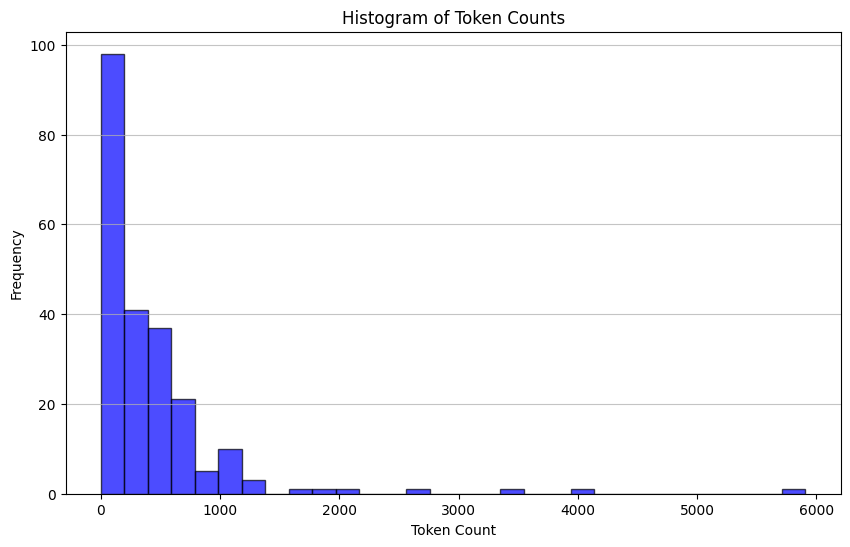

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(content_tokens, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

# Getting Number of tokens For each Document using tiktoken

In [23]:
counts = [num_tokens_from_string(item["page_content"], "cl100k_base") for item in tqdm(json_data)]

100%|██████████| 222/222 [00:00<00:00, 1420.82it/s]


In [24]:
print(max(counts))

6485


# Plotting the histogram of token counts

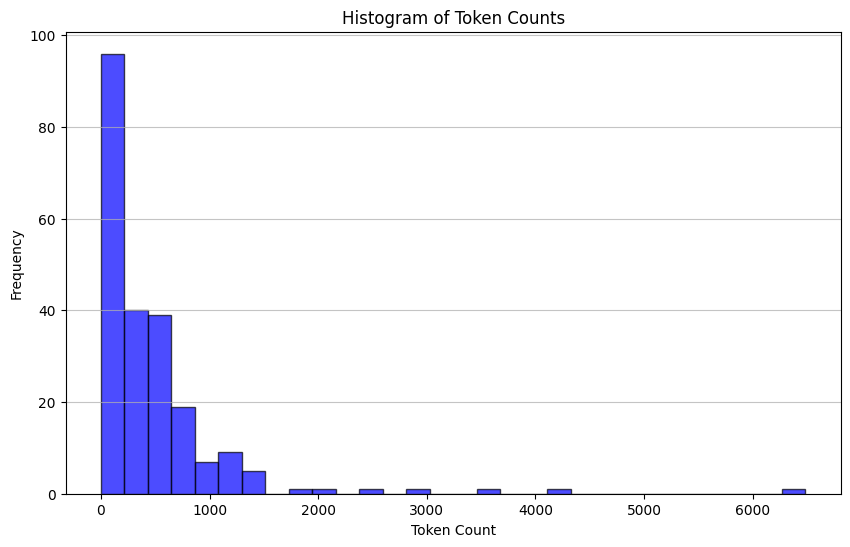

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

# Getting the Max Sequence Length for Embedding Model

In [26]:
model_name = "intfloat/multilingual-e5-large" # Max Seq Len = 512

In [27]:
# model_name = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2" ## Max Seq Len = 128

In [28]:
embedding_model = SentenceTransformer(model_name_or_path=model_name, device="cuda") # choose the device to load the model to (note: GPU will often be *much* faster than CPU)

In [29]:
print(f"Model 's Maximum Sequence Length : {SentenceTransformer(model_name).max_seq_length}")

Model 's Maximum Sequence Length : 512


Because of that , We will use Embedding Engine "intfloat/multilingual-e5-large"

# Defining the chunk size for each Document

In [30]:
single_list_text_chunks = []
documents_and_chunks = json_data

In [31]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 250,
    chunk_overlap = 0,
    #separators = [" ."]#["\n"]# , "\n" , " " , ""]
)

In [32]:
for item in tqdm(documents_and_chunks):
    chunks = r_splitter.split_text(str(item['page_content']))
    if len(chunks) > 0:
        item["sentence_chunks"] = chunks
        #print(item["sentence_chunks"])
        #print("\n")
        item["num_chunks"] = len(chunks)
        #print("We 've here in That Document : "+str(len(item["sentence_chunks"]))+" Chunks ")
        single_chunk_tokens = [len(word_tokenize(item)) for item in tqdm(chunks)]
        item["single_chunk_tokens"] = single_chunk_tokens
        item["max_single_chunk_token"] = max(single_chunk_tokens)
        #print(single_chunk_tokens)
        #print("The Max number of tokens from the biggest chunk : " + str(max(single_chunk_tokens)) + " Tokens ")
        #print("==========================================================================================")
        #print("\n")
    else:
        print("\nThat Document has no data : \n")
        print(item)
        print("\n")
        print("==========================================================================================")

100%|██████████| 3/3 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 3462.08it/s]

100%|██████████| 18/18 [00:00<00:00, 2466.03it/s]

100%|██████████| 14/14 [00:00<00:00, 1964.02it/s]

100%|██████████| 3/3 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<?, ?it/s][A

100%|██████████| 6/6 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 4975.73it/s]

100%|██████████| 7/7 [00:00<00:00, 1654.09it/s]

100%|██████████| 6/6 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 1701.24it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 1326.16it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 1500.76it/s]

100%|██████████| 14/14 [00:00<00:00, 2988.16it/s]

100%|██████████| 149/149 [00:00<00:00, 4232.28it/s]

100%|██████████| 27/27 [00:00<00:00, 3148.26it/s]

100%|██████████| 16/16 [00:00<00:00, 2376.71it/s]

100%|██████████| 15/15 [00:00<00:00, 2311.85it/s]

100%|██████████| 17/17 [00:00<00:00, 5774.47it/s]

100%|██████████| 


That Document has no data : 

{'page_content': '', 'metadata': {'source': '49 page_source ', 'title': 'HiraDummyTestPageTrashNotforUse', 'link': 'https://www.expertflow.com/hiradummytestpagetrashnotforuse/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 26/26 [00:00<00:00, 1897.71it/s]

100%|██████████| 29/29 [00:00<00:00, 12076.53it/s]

100%|██████████| 14/14 [00:00<00:00, 5973.58it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 176.77it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 1247.15it/s]

100%|██████████| 55/55 [00:00<00:00, 3819.51it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 1679.12it/s]

100%|██████████| 3/3 [00:00<00:00, 1126.69it/s]

100%|██████████| 6/6 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:00<00:00, 1861.87it/s]

100%|██████████| 15/15 [00:00<00:00, 2991.66it/s]

100%|██████████| 7/7 [00:00<00:00, 1143.71it/s]

100%|██████████| 22/22 [00:00<00:00, 2444.04it/s]

100%|██████████| 24/24 [00:00<00:00, 3581.81it/s]

100%|██████████| 13/13 [00:00<?, ?it/s][A

100%|██████████| 4/4 [00:00<00:00, 254.10it/s]



That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '73 page_source ', 'title': 'My account', 'link': 'https://www.expertflow.com/my-account/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}



That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '74 page_source ', 'title': 'Checkout', 'link': 'https://www.expertflow.com/checkout/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}



That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '75 page_source ', 'title': 'Cart', 'link': 'https://www.expertflow.com/cart/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentence


100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<?, ?it/s][A

100%|██████████| 1/1 [00:00<?, ?it/s]



That Document has no data : 

{'page_content': '', 'metadata': {'source': '81 page_source ', 'title': 'Dashboards and Wallboards', 'link': 'https://www.expertflow.com/dashboards-and-wallboards/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}



That Document has no data : 

{'page_content': '', 'metadata': {'source': '82 page_source ', 'title': 'Blog', 'link': 'https://www.expertflow.com/blog/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 1215.89it/s]



That Document has no data : 

{'page_content': '\xa0', 'metadata': {'source': '88 page_source ', 'title': 'Surfly &#8211; Testing Page', 'link': 'https://www.expertflow.com/surfly-testing-page/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\xa0'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}





100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 673.46it/s]

100%|██████████| 19/19 [00:00<00:00, 1647.72it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 1340.03it/s]

100%|██████████| 8/8 [00:00<00:00, 810.06it/s]

100%|██████████| 5/5 [00:00<00:00, 1057.46it/s]

100%|██████████| 3/3 [00:00<00:00, 904.53it/s]

100%|██████████| 4/4 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 534.53it/s]

100%|██████████| 6/6 [00:00<00:00, 1469.19it/s]

100%|██████████| 2/2 [00:00<00:00, 440.14it/s]

100%|██████████| 2/2 [00:00<00:00, 642.56it/s]

100%|██████████| 5/5 [00:00<00:00, 813.04it/s]

100%|██████████| 6/6 [00:00<00:00, 880.23it/s]

100%|██████████| 16/16 [00:


That Document has no data : 

{'page_content': '', 'metadata': {'source': '21 post_source ', 'title': 'Social Media Page Management &#8211; Filter Harassment', 'link': 'https://www.expertflow.com/blog/toxiclanguage/', 'post_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 8/8 [00:00<00:00, 1176.32it/s]

100%|██████████| 7/7 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 1001.33it/s]

100%|██████████| 5/5 [00:00<00:00, 971.58it/s]

100%|██████████| 14/14 [00:00<00:00, 1980.78it/s]

100%|██████████| 10/10 [00:00<00:00, 1428.63it/s]

100%|██████████| 11/11 [00:00<?, ?it/s][A

100%|██████████| 7/7 [00:00<00:00, 1192.10it/s]

100%|██████████| 9/9 [00:00<00:00, 571.23it/s]

100%|██████████| 24/24 [00:00<00:00, 3384.10it/s]

100%|██████████| 14/14 [00:00<00:00, 4651.11it/s]

100%|██████████| 6/6 [00:00<00:00, 2048.33it/s]

100%|██████████| 12/12 [00:00<00:00, 1990.18it/s]

100%|██████████| 29/29 [00:00<00:00, 1617.10it/s]

100%|██████████| 8/8 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 2531.86it/s]

100%|██████████| 8/8 [00:00<00:00, 3182.93it/s]

100%|██████████| 9/9 [00:00<00:00, 2232.99it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:00<00:00, 2164.21it/s]

10


That Document has no data : 

{'page_content': '', 'metadata': {'source': '26 page_source ', 'title': 'ACTIVE_CUIC Reports', 'link': 'https://www.expertflow.com/cuic-reports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 16/16 [00:00<00:00, 1724.19it/s]

100%|██████████| 14/14 [00:00<?, ?it/s][A

100%|██████████| 14/14 [00:00<?, ?it/s][A

100%|██████████| 8/8 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 1089.16it/s]

100%|██████████| 50/50 [00:00<00:00, 2871.59it/s]

100%|██████████| 37/37 [00:00<00:00, 8697.49it/s]



That Document has no data : 

{'page_content': '', 'metadata': {'source': '35 page_source ', 'title': 'ACTIVE_Expertflow &#8211; CUIC reports', 'link': 'https://www.expertflow.com/cuicreports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 18/18 [00:00<00:00, 828.44it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 5810.29it/s]

100%|██████████| 33/33 [00:00<00:00, 5187.86it/s]

100%|██████████| 13/13 [00:00<00:00, 829.42it/s]

100%|██████████| 5/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 1795.95it/s]

100%|██████████| 29/29 [00:00<00:00, 3539.81it/s]



That Document has no data : 

{'page_content': '', 'metadata': {'source': '45 page_source ', 'title': 'ACTIVE_USD_Install_Guide', 'link': 'https://www.expertflow.com/ms-usd-install-guide/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 21/21 [00:00<?, ?it/s][A

100%|██████████| 21/21 [00:00<?, ?it/s][A

100%|██████████| 6/6 [00:00<00:00, 448.83it/s]

100%|██████████| 8/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 678.59it/s]

100%|██████████| 12/12 [00:00<?, ?it/s][A

100%|██████████| 37/37 [00:00<00:00, 5811.03it/s]

100%|██████████| 19/19 [00:00<?, ?it/s][A

100%|██████████| 13/13 [00:00<00:00, 2994.45it/s]

100%|██████████| 13/13 [00:00<00:00, 1704.04it/s]

100%|██████████| 10/10 [00:00<00:00, 4432.32it/s]

100%|██████████| 16/16 [00:00<00:00, 4040.27it/s]

100%|██████████| 15/15 [00:00<?, ?it/s][A

100%|██████████| 30/30 [00:00<00:00, 1772.42it/s]

100%|██████████| 24/24 [00:00<00:00, 5392.00it/s]

100%|██████████| 12/12 [00:00<?, ?it/s][A

100%|██████████| 22/22 [00:00<00:00, 3125.84it/s]

100%|██████████| 17/17 [00:00<00:00, 1086.56it/s]

100%|██████████| 23/23 [00:00<?, ?it/s][A

100%|██████████| 22/22 [00:00<00:00, 2145.22it/s]

100%|██████████| 222/222 [00:02<00:00, 98.72it/s]


In [33]:
random.sample(documents_and_chunks, k=1)

[{'page_content': ' Uganda Revenue Authority Feedback: “We are pleased with the expertise and professionalism of the Expertflow team. Its products have improved our customer services enabling agents with tools to respond more efficiently. The self-service IVR & chat provides automated responses based on the customer’s profile and knowledge base, thus reducing average handle time”. Uganda Revenue Authority assesses, collects and accounts for Central Government Tax Revenue. As the tax collection process can be complex and overwhelming for many taxpayers, URA strives to provide excellent customer service to make the process easier and more efficient. To achieve this goal, URA partnered with Expertflow, a global provider of customer experience solutions. Expertflow upgraded URA’s Cisco Unified Contact Center Express and implemented an IVR integration with backend CRM to provide self-service for WhatsApp and web chat as part of an ongoing improvement. The upgrade enables citizens to interac

In [34]:
# Turn text chunks into a single list
single_list_text_chunks = [chunk for item in (r_splitter.split_text(item['page_content']) for item in tqdm(documents_and_chunks)) for chunk in item]

100%|██████████| 222/222 [00:00<00:00, 2252.41it/s]


In [35]:
# for item in text_chunks:
#     for chunk in item:
#         single_list_text_chunks.append(chunk)
#         print(chunk)
#         print("\n")

In [36]:
print("We've "+str(len(single_list_text_chunks)) + " Chunks ")

We've 2579 Chunks 


# Getting the Max Token length in our Chunks

In [37]:
content_tokens = [len(word_tokenize(item)) for item in tqdm(single_list_text_chunks)]

100%|██████████| 2579/2579 [00:00<00:00, 3433.33it/s]


In [38]:
print("The Max Tokens in Whole Chunks : " + str(max(content_tokens)))

The Max Tokens in Whole Chunks : 70


# Passing Chunks to the Embedding Model

In [44]:
%%time
# Sentences are encoded/embedded by calling model.encode()
embedding_model.to("cuda")
# Create embeddings one by one on the GPU
for item in tqdm(documents_and_chunks):
    if "sentence_chunks" in item:
        item["embedding"] = embedding_model.encode(item["sentence_chunks"]).tolist()
    else:
        print("\n")
        print(item)
        print("That Document " + item["page_content"] + " has no chunks to be embedded")

 22%|██▏       | 49/222 [00:17<01:14,  2.33it/s]



{'page_content': '', 'metadata': {'source': '49 page_source ', 'title': 'HiraDummyTestPageTrashNotforUse', 'link': 'https://www.expertflow.com/hiradummytestpagetrashnotforuse/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 36%|███▌      | 79/222 [00:26<00:16,  8.62it/s]



{'page_content': '\n', 'metadata': {'source': '73 page_source ', 'title': 'My account', 'link': 'https://www.expertflow.com/my-account/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document 
 has no chunks to be embedded


{'page_content': '\n', 'metadata': {'source': '74 page_source ', 'title': 'Checkout', 'link': 'https://www.expertflow.com/checkout/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document 
 has no chunks to be embedded


{'page_content': '\n', 'metadata': {'source': '75 page_source ', 'title': 'Cart', 'link': 'https://www.expertflow.com/cart/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences

 38%|███▊      | 85/222 [00:27<00:15,  8.90it/s]



{'page_content': '', 'metadata': {'source': '81 page_source ', 'title': 'Dashboards and Wallboards', 'link': 'https://www.expertflow.com/dashboards-and-wallboards/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


{'page_content': '', 'metadata': {'source': '82 page_source ', 'title': 'Blog', 'link': 'https://www.expertflow.com/blog/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 41%|████      | 91/222 [00:28<00:14,  9.04it/s]



{'page_content': '\xa0', 'metadata': {'source': '88 page_source ', 'title': 'Surfly &#8211; Testing Page', 'link': 'https://www.expertflow.com/surfly-testing-page/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\xa0'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document   has no chunks to be embedded


 55%|█████▌    | 123/222 [00:33<00:20,  4.86it/s]



{'page_content': '', 'metadata': {'source': '21 post_source ', 'title': 'Social Media Page Management &#8211; Filter Harassment', 'link': 'https://www.expertflow.com/blog/toxiclanguage/', 'post_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 81%|████████  | 179/222 [00:46<00:14,  2.99it/s]



{'page_content': '', 'metadata': {'source': '26 page_source ', 'title': 'ACTIVE_CUIC Reports', 'link': 'https://www.expertflow.com/cuic-reports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 85%|████████▍ | 188/222 [00:50<00:20,  1.68it/s]



{'page_content': '', 'metadata': {'source': '35 page_source ', 'title': 'ACTIVE_Expertflow &#8211; CUIC reports', 'link': 'https://www.expertflow.com/cuicreports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 89%|████████▉ | 198/222 [00:53<00:11,  2.14it/s]



{'page_content': '', 'metadata': {'source': '45 page_source ', 'title': 'ACTIVE_USD_Install_Guide', 'link': 'https://www.expertflow.com/ms-usd-install-guide/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


100%|██████████| 222/222 [01:03<00:00,  3.51it/s]

CPU times: total: 40.8 s
Wall time: 1min 3s


In [45]:
random.sample(documents_and_chunks, k=1)

[{'page_content': 'Your traffic is no longer being tracked.',
  'metadata': {'source': '35 page_source ',
   'title': 'employee confirmation',
   'link': 'https://www.expertflow.com/employee-confirmation/',
   'page_number': '1',
   'hour_of_update': '1',
   'minute_for_update': '3'},
  'sentences': ['Your traffic is no longer being tracked.'],
  'page_sentence_count_spacy': 1,
  'document_character_length': 40,
  'document_tokens_nltk': 8,
  'document_tokens_tiktoken': 8,
  'sentence_chunks': ['Your traffic is no longer being tracked.'],
  'num_chunks': 1,
  'single_chunk_tokens': [8],
  'max_single_chunk_token': 8,
  'embedding': [[0.011880297213792801,
    -0.008365404792129993,
    -0.01666283793747425,
    -0.016997920349240303,
    0.00895981676876545,
    -0.015679752454161644,
    -0.025070518255233765,
    0.062448613345623016,
    0.08414793014526367,
    -0.03736821934580803,
    0.03697793558239937,
    -0.002116916934028268,
    -0.019500453025102615,
    -0.01409457717090

In [41]:
# %%time

# # Embed all texts in batches
# text_chunk_embeddings = embedding_model.encode(single_list_text_chunks,
#                                                batch_size=32,)
#                                                #convert_to_tensor=True) # optional to return embeddings as tensor instead of array

### Save embeddings to file

In [46]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(documents_and_chunks)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [47]:
documents_and_chunks[0]['embedding'][0]

[0.02856074832379818,
 -0.014528023079037666,
 -0.01321784220635891,
 -0.036905381828546524,
 0.01320568285882473,
 -0.03014114312827587,
 -0.021776987239718437,
 0.0286708977073431,
 0.0625823587179184,
 0.0006797219975851476,
 0.057533394545316696,
 0.022080738097429276,
 -0.034209661185741425,
 -0.006911937613040209,
 -0.030173704028129578,
 -0.0023921767715364695,
 -0.00961949024349451,
 -0.0010674860095605254,
 0.011050391010940075,
 -0.051972102373838425,
 0.040997616946697235,
 -0.03510139137506485,
 -0.022023586556315422,
 -0.061400510370731354,
 -0.01713324710726738,
 -0.021623991429805756,
 -0.07053296267986298,
 -0.05813421681523323,
 0.0011579574784263968,
 -0.019857065752148628,
 -0.025917312130331993,
 -0.0032028062269091606,
 -0.008852571249008179,
 -0.037186846137046814,
 -0.028029106557369232,
 0.05346178635954857,
 0.04789162054657936,
 0.02851770631968975,
 -0.06178712844848633,
 0.029806172475218773,
 -0.0073108673095703125,
 0.050916433334350586,
 -0.00990934204310

In [59]:
# text_chunk_embeddings

tensor([[ 0.0286, -0.0145, -0.0132,  ..., -0.0227, -0.0308, -0.0150],
        [ 0.0387, -0.0166, -0.0384,  ..., -0.0200, -0.0505, -0.0150],
        [ 0.0318, -0.0506, -0.0173,  ...,  0.0056, -0.0330, -0.0050],
        ...,
        [ 0.0243,  0.0080, -0.0177,  ..., -0.0115, -0.0286, -0.0090],
        [ 0.0023, -0.0332, -0.0071,  ..., -0.0172, -0.0355,  0.0026],
        [ 0.0206, -0.0364, -0.0289,  ..., -0.0082, -0.0230, -0.0099]],
       device='cuda:0')

In [47]:
# import numpy as np
# import faiss

# # Assuming documents is a list containing the dictionary with embeddings
# # embeddings = [doc['embedding'] for doc in documents_and_chunks]

# # Initialize a Faiss index
# index = faiss.IndexFlatL2(text_chunk_embeddings.shape[1])  # Assuming L2 distance

# # Add vectors to the index
# index.add(text_chunk_embeddings)

# # Save the index to disk
# faiss.write_index(index, "my_index.faiss")

In [48]:
# # Load the index from disk
# index = faiss.read_index("my_index.faiss")

# # Query vector
# query_vector = np.random.rand(1, text_chunk_embeddings.shape[1]).astype('float32')

# # Perform a nearest neighbor search
# k = 5  # Number of nearest neighbors to retrieve
# distances, indices = index.search(query_vector, k)

# # Print the indices and corresponding distances
# print("Indices of nearest neighbors:", indices)
# print("Distances to nearest neighbors:", distances)